In [15]:
import cv2
import os
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from PIL import Image
import numpy as np

hr_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR/'
non_finetuned_folder = '/content/drive/MyDrive/csc_496FinalProject/ESRGAN/results_tif/'
finetuned_folder = "/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/"

hr_img_names = sorted(os.listdir(hr_folder))

# GPT help to make loop easier. pretty much just redoing what is done in finetune and non finetune .ipynb
for hr_img_name in hr_img_names:
    base_name = hr_img_name.split('.')[0]

    hr_path = os.path.join(hr_folder, hr_img_name)
    non_finetuned_path = os.path.join(non_finetuned_folder, base_name.replace('HR', 'LR') + '_rlt.png')
    finetuned_path = os.path.join(finetuned_folder, base_name.replace('HR', 'LR') + '_finetune.png')

    img_hr = cv2.imread(hr_path, cv2.IMREAD_COLOR)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2GRAY)

    if os.path.exists(non_finetuned_path):
        img_non_finetuned = cv2.imread(non_finetuned_path, cv2.IMREAD_COLOR)
        img_non_finetuned = cv2.cvtColor(img_non_finetuned, cv2.COLOR_BGR2GRAY)

        psnr_value = psnr(img_hr, img_non_finetuned)
        ssim_value = ssim(img_hr, img_non_finetuned)

        print(f"Non-Finetuned - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}")
    else:
        print(f"Non-finetuned image {non_finetuned_path} not found.")

    if os.path.exists(finetuned_path):
        img_finetuned = cv2.imread(finetuned_path, cv2.IMREAD_COLOR)
        img_finetuned = cv2.cvtColor(img_finetuned, cv2.COLOR_BGR2GRAY)

        psnr_value = psnr(img_hr, img_finetuned)
        ssim_value = ssim(img_hr, img_finetuned)

        print(f"Finetuned - PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.4f}")
    else:
        print(f"Finetuned image {finetuned_path} not found.")

Non-Finetuned - PSNR: 30.80, SSIM: 0.7876
Finetuned - PSNR: 31.44, SSIM: 0.8367
Non-Finetuned - PSNR: 30.75, SSIM: 0.7649
Finetuned - PSNR: 32.02, SSIM: 0.8253
Non-Finetuned - PSNR: 31.04, SSIM: 0.7545
Finetuned - PSNR: 32.16, SSIM: 0.8069


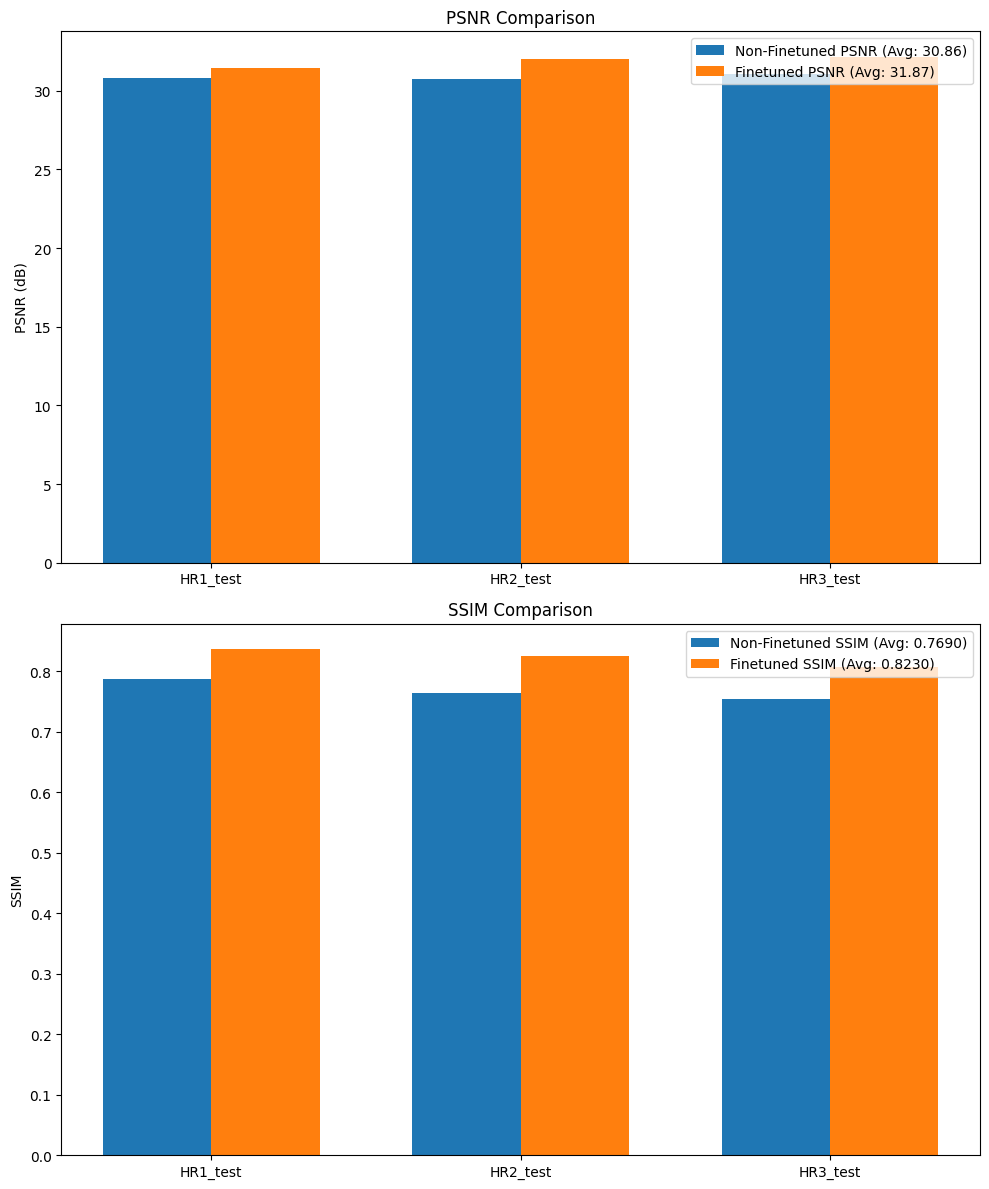

In [17]:
# Fed into GPT -- Visualize SSIM and PSNR between finetuned and non-finetuned. Add avg vals as key
# Data from code above
hr_images = ['HR1_test', 'HR2_test', 'HR3_test']
psnr_non_finetuned = [30.80, 30.75, 31.04]
psnr_finetuned = [31.44, 32.02, 32.16]
ssim_non_finetuned = [0.7876, 0.7649, 0.7545]
ssim_finetuned = [0.8367, 0.8253, 0.8069]

# Calculate averages
avg_psnr_non_finetuned = np.mean(psnr_non_finetuned)
avg_psnr_finetuned = np.mean(psnr_finetuned)
avg_ssim_non_finetuned = np.mean(ssim_non_finetuned)
avg_ssim_finetuned = np.mean(ssim_finetuned)

# Setup for bar charts
x = np.arange(len(hr_images))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# PSNR Comparison
ax[0].bar(x - width/2, psnr_non_finetuned, width, label=f'Non-Finetuned PSNR (Avg: {avg_psnr_non_finetuned:.2f})')
ax[0].bar(x + width/2, psnr_finetuned, width, label=f'Finetuned PSNR (Avg: {avg_psnr_finetuned:.2f})')
ax[0].set_ylabel('PSNR (dB)')
ax[0].set_title('PSNR Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(hr_images)
ax[0].legend()

# SSIM Comparison
ax[1].bar(x - width/2, ssim_non_finetuned, width, label=f'Non-Finetuned SSIM (Avg: {avg_ssim_non_finetuned:.4f})')
ax[1].bar(x + width/2, ssim_finetuned, width, label=f'Finetuned SSIM (Avg: {avg_ssim_finetuned:.4f})')
ax[1].set_ylabel('SSIM')
ax[1].set_title('SSIM Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(hr_images)
ax[1].legend()
plt.tight_layout()
plt.savefig(os.path.join('/content/drive/MyDrive/csc_496FinalProject/Overall_Results/PSNR_SSIM_Comparison.png'))
plt.show()

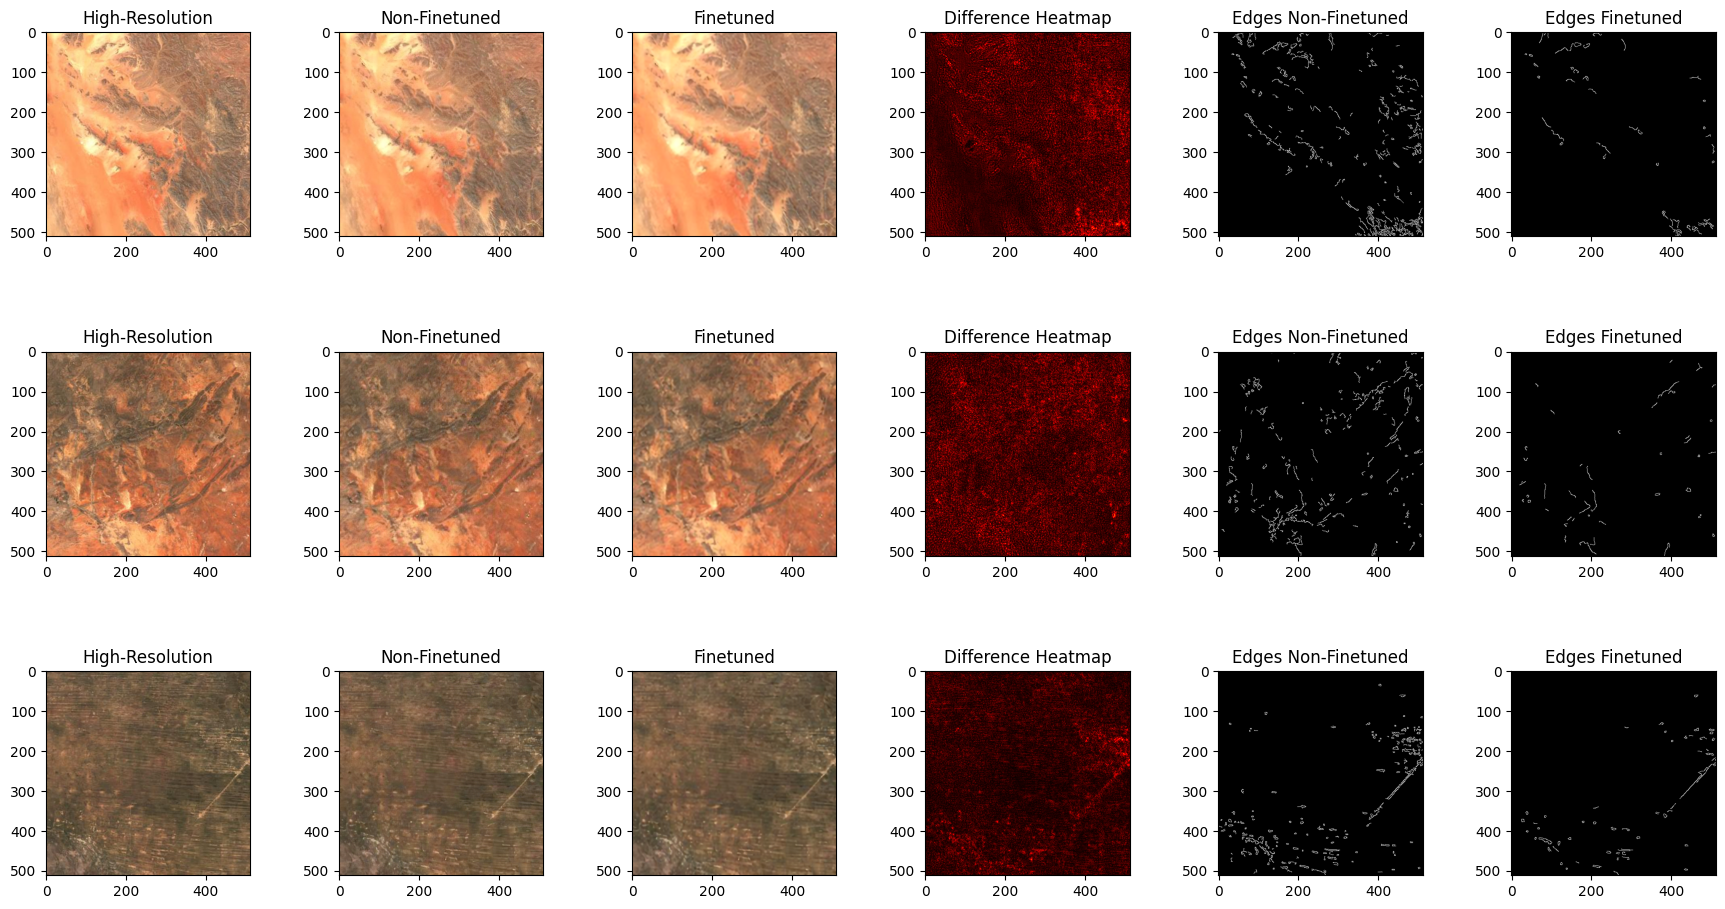

In [14]:
import matplotlib.pyplot as plt
import cv2
import os
from skimage.metrics import structural_similarity as ssim


hr_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/test/HR/'
non_finetuned_folder = '/content/drive/MyDrive/csc_496FinalProject/ESRGAN/results_tif/'
finetuned_folder = "/content/drive/MyDrive/csc_496FinalProject/ESRGAN_finetune/output/"

hr_img_names = sorted(os.listdir(hr_folder))

num_images = min(3, len(hr_img_names))

fig, axes = plt.subplots(num_images, 6, figsize=(18, 10))
fig.tight_layout(pad=3)


# GPT

for i in range(num_images):
    hr_img_path = os.path.join(hr_folder, hr_img_names[i])
    hr_img = cv2.imread(hr_img_path, cv2.IMREAD_COLOR)
    if hr_img is None:
        print(f"Failed to load HR image: {hr_img_path}")
        continue
    hr_img_gray = cv2.cvtColor(hr_img, cv2.COLOR_BGR2GRAY)

    # Non-Finetuned image loading and visualization
    non_finetuned_name = hr_img_names[i].replace('HR', 'LR').split('.')[0] + '_rlt.png'
    non_finetuned_path = os.path.join(non_finetuned_folder, non_finetuned_name)
    non_finetuned_img = cv2.imread(non_finetuned_path, cv2.IMREAD_COLOR)
    non_finetuned_gray = cv2.cvtColor(non_finetuned_img, cv2.COLOR_BGR2GRAY) if non_finetuned_img is not None else None

    # Finetuned image loading and visualization
    finetuned_name = hr_img_names[i].replace('HR', 'LR').split('.')[0] + '_finetune.png'
    finetuned_path = os.path.join(finetuned_folder, finetuned_name)
    finetuned_img = cv2.imread(finetuned_path, cv2.IMREAD_COLOR)
    finetuned_gray = cv2.cvtColor(finetuned_img, cv2.COLOR_BGR2GRAY) if finetuned_img is not None else None

    # Display HR, non-finetuned, and finetuned images
    axes[i, 0].imshow(cv2.cvtColor(hr_img, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("High-Resolution")
    if non_finetuned_img is not None:
        axes[i, 1].imshow(cv2.cvtColor(non_finetuned_img, cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title("Non-Finetuned")
    if finetuned_img is not None:
        axes[i, 2].imshow(cv2.cvtColor(finetuned_img, cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title("Finetuned")

    # Calculate and display the difference heatmap
    if non_finetuned_gray is not None and finetuned_gray is not None:
        difference = cv2.absdiff(non_finetuned_gray, finetuned_gray)
        axes[i, 3].imshow(difference, cmap='hot')
        axes[i, 3].set_title('Difference Heatmap')

    # Edge detection comparison
    if non_finetuned_gray is not None:
        edges_non_finetuned = cv2.Canny(non_finetuned_gray, 100, 200)
        axes[i, 4].imshow(edges_non_finetuned, cmap='gray')
        axes[i, 4].set_title('Edges Non-Finetuned')
    if finetuned_gray is not None:
        edges_finetuned = cv2.Canny(finetuned_gray, 100, 200)
        axes[i, 5].imshow(edges_finetuned, cmap='gray')
        axes[i, 5].set_title('Edges Finetuned')

output_path = '/content/drive/MyDrive/csc_496FinalProject/Overall_Results/HRvsFinetunedVSnofinetune_results.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

VISUALIZE DATA

In [21]:
import cv2
import os
import matplotlib.pyplot as plt

hr_folder = '/content/drive/MyDrive/csc_496FinalProject/Data/Copernicus_data/remote_sensing/train/HR/'

files = [os.path.join(hr_folder, f) for f in os.listdir(hr_folder) if os.path.isfile(os.path.join(hr_folder, f))]

grid_size = 4

num_images = min(len(files), grid_size**2)

fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for ax, file in zip(axes.flatten(), files[:num_images]):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax.imshow(img)
    ax.axis('off')

output_path = '/content/drive/MyDrive/csc_496FinalProject/Overall_Results/HRvsFinetunedVSnofinetune_results.png'
plt.savefig(output_path)
plt.show()

Output hidden; open in https://colab.research.google.com to view.